# 3.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

# A.)what can be amount for the given duration.(Regression)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
trd_df=pd.read_csv('training_set.csv')

In [3]:
# testing data whose loan has been rejected (on testing data for which we have done predictions in problem 1)
tsd_df=pd.read_csv('test_Pred.csv')
tsd_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [4]:
tsd_df[tsd_df.Loan_Status=='N']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,LP002774,Male,Yes,0,Not Graduate,No,1700,2900,67.0,360.0,0.0,Urban,N
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.0,Rural,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.0,Rural,N


In [5]:
trd_df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
tsd_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
trd=trd_df.drop('Loan_ID',axis=1)
tsd=tsd_df.drop('Loan_ID',axis=1)

In [8]:
cat=[]
con=[]
for i in trd.columns:
    if(trd[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)  

In [9]:
trd[cat].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [10]:
trd[con].nunique()

ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [11]:
con.remove('Credit_History')
cat.append('Credit_History')

In [12]:
for i in con:
    x=trd[i].mean()
    trd[i]=trd[i].fillna(x)
    tsd[i]=tsd[i].fillna(x)

In [13]:
for i in cat:
    x=trd[i].mode()[0]
    trd[i]=trd[i].fillna(x)
    tsd[i]=tsd[i].fillna(x)

# Outliers

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(trd[con])
df=pd.DataFrame(array,columns=con)

In [15]:
out=[]
for i in con:
    out=out+list(df[(df[i]>3)|(df[i]<-3)].index)

In [16]:
from numpy import unique
outliers=list(unique(out))

In [17]:
#Dropping the rows which have ouliers

trd=trd.drop(index=outliers,axis=0)

In [18]:
trd.shape

(577, 12)

In [19]:
trd.index=range(0,577)

# EDA

In [20]:
y=trd[['LoanAmount']]
x=trd.drop('LoanAmount',axis=1)
x=pd.get_dummies(x)

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(x)
x=pd.DataFrame(array,columns=x.columns)
X=x.copy()

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain,ytrain)

tr_acc=lr.score(xtrain,ytrain)
ts_acc=lr.score(xtest,ytest)
tr_acc,ts_acc

(0.4166522062823058, 0.31105124457111855)

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lr,direction='forward')
sfs.fit(x,y)

array = sfs.get_support()

s1 = pd.Series(array,index=x.columns)
s1

ApplicantIncome             True
CoapplicantIncome           True
Loan_Amount_Term            True
Credit_History             False
Gender_Female              False
Gender_Male                False
Married_No                  True
Married_Yes                False
Dependents_0                True
Dependents_1               False
Dependents_2               False
Dependents_3+               True
Education_Graduate          True
Education_Not Graduate      True
Self_Employed_No           False
Self_Employed_Yes          False
Property_Area_Rural        False
Property_Area_Semiurban    False
Property_Area_Urban        False
Loan_Status_N               True
Loan_Status_Y               True
dtype: bool

In [25]:
x=x[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Married_No','Dependents_0','Dependents_3+','Education_Graduate','Education_Not Graduate','Loan_Status_N','Loan_Status_Y']]

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [27]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

tr_acc=lr.score(xtrain,ytrain)
ts_acc=lr.score(xtest,ytest)
tr_acc,ts_acc

(0.40999832960707516, 0.3330403220050481)

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=21)

In [29]:
def modeller(mo):
    mo.fit(xtrain,ytrain)
    tr_acc=mo.score(xtrain,ytrain)
    ts_acc=mo.score(xtest,ytest)
    return tr_acc,ts_acc

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
modeller(dtr)

(0.999736805661141, -0.464853621488561)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
modeller(rfr)

(0.9149229260507767, 0.07913657745588365)

In [32]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=21)
modeller(abr)

(0.5817322986343477, 0.12894341927132658)

In [33]:
tr = []
ts = []
for i in range(2,100,1):
    abc = AdaBoostRegressor(n_estimators=i)
    t1,t2 = modeller(abc)
    tr.append(t1)
    ts.append(t2)

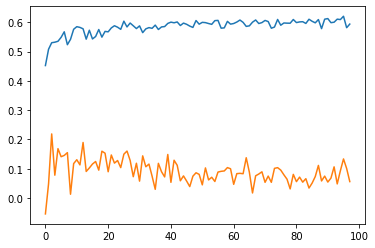

In [34]:
plt.plot(tr)
plt.plot(ts)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

tr = []
ts = []
for i in range(2,100,1):
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=i)
    t1,t2 = modeller(knr)
    tr.append(t1)
    ts.append(t2)

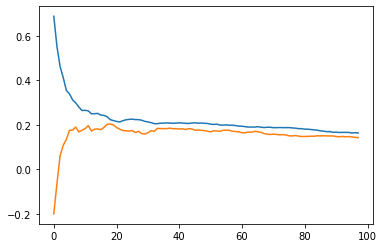

In [36]:
plt.plot(tr)
plt.plot(ts)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=20)
modeller(knr)

(0.22284438680272634, 0.20333467005617967)

# Final Model

# With KNeighbors Regressor

In [38]:
knr = KNeighborsRegressor(n_neighbors=20)
model = knr.fit(X,y)

In [39]:
tsd1=tsd.drop('LoanAmount',axis=1)
tsd1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,360.0,1.0,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,360.0,1.0,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,360.0,1.0,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,360.0,1.0,Rural,Y


In [40]:
z=pd.get_dummies(tsd1)

In [41]:
array=ss.transform(z)
z=pd.DataFrame(array,columns=z.columns)

In [42]:
pred=model.predict(z)

In [43]:
tsd_df['LoanAmount_pred_Approve']=pred

In [44]:
tsd_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_pred_Approve
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y,121.641216
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y,150.050000
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y,149.570608
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y,142.620608
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y,97.170608


# B.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [45]:
test_df1 = tsd_df[(tsd_df.Loan_Status == 'N') & (tsd_df.Loan_Amount_Term <= 240)]

In [46]:
train=trd[trd.Loan_Status=='Y']

In [47]:
train.shape

(398, 12)

In [48]:
train.index=range(0,398)

In [49]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
393,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,360.0,1.0,Rural,Y
394,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
395,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
396,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y


In [50]:
y=train['Loan_Amount_Term']
x=train.drop(['Loan_Amount_Term'],axis=1)

In [51]:
x=pd.get_dummies(x)

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(x)
x=pd.DataFrame(array,columns=x.columns)

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
modeller(dtr)

(1.0, -1.2357377049180327)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
modeller(rfr)

(0.8168887695169591, -0.11659550819672093)

In [56]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=21)
modeller(abr)

(-0.01962481799451421, -0.23420594160269692)

In [57]:
from sklearn.neighbors import KNeighborsRegressor

tr = []
ts = []
for i in range(2,100,1):
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=i)
    t1,t2 = modeller(knr)
    tr.append(t1)
    ts.append(t2)

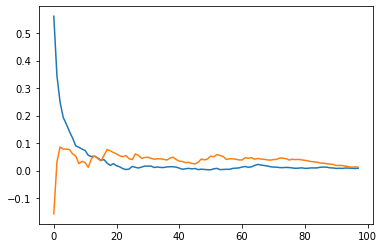

In [58]:
plt.plot(tr)
plt.plot(ts)

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=15)
modeller(knr)

(0.05244706806390942, 0.05380983606557388)

In [60]:
knr = KNeighborsRegressor(n_neighbors=15)
model = knr.fit(x,y)

In [61]:
tsd2=tsd.drop('Loan_Amount_Term',axis=1)
tsd2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,1.0,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115.0,1.0,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126.0,1.0,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,158.0,1.0,Rural,Y


In [62]:
p=pd.get_dummies(tsd2)

In [63]:
p=p.drop('Loan_Status_N',axis=1)

In [64]:
array=ss.transform(p)
p=pd.DataFrame(array,columns=p.columns)

In [65]:
pred=model.predict(p)

In [66]:
tsd_df['Loan_Amount_Term_Approve']=pred

In [67]:
tsd_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_pred_Approve,Loan_Amount_Term_Approve
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y,121.641216,336.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y,150.050000,360.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y,149.570608,332.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y,142.620608,348.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y,97.170608,340.0
